## Investigating the average duration of movies over the years - 2011 to 2020
<p>Given the large number of movies and series available on the netflix platform, it is a perfect opportunity to flex my data manipulation skills and dive into the entertainment industry.</p>

<p>The assumption for this project is that the average duration of movies has been declining over the years, as evidence of this, I have secured information relating to the years from 2011 to 2020, the average movie durations are said to be 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>

<p>If we're going to be working with this data, we know a good place to start would be to probably start working with <code>pandas</code>. But first I'll need to create a DataFrame from scratch.


#### 1. Loading data into a dictionary 

In [26]:
# Create the years and durations lists
years = ["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years":years,
             "durations":durations}

# Print the dictionary
movie_dict

{'years': ['2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020'],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

#### 2. Creating a DataFrame from a dictionary
To convert our dictionary movie_dict to a pandas DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

In [13]:
# Import pandas under its usual alias
import pandas as pd 
import os

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


#### 3. A visual inspection of our data
Alright, we now have a pandas DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on the assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.



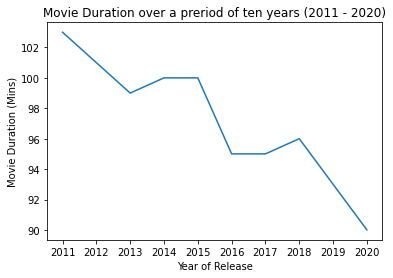

In [27]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
plt.title("Movie Duration over a preriod of ten years (2011 - 2020)")
plt.xlabel("Year of Release")
plt.ylabel("Movie Duration (Mins)")


# Show the plot
plt.show()

#### 4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with a few aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

 1. What does this trend look like over a longer period of time?
 2. Is this explainable by something like the genre of entertainment?
 
We now need to access the CSV file to further explore the assumption that movies' duration has been declining over the years. Let's create another DataFrame, this time with all of the data. The entire DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [28]:
print (os.getcwd ())

C:\Users\ttz6\Downloads


In [32]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("C:/Users/ttz6/Downloads/netflix_data.csv")
# Print the first five rows of the DataFrame
print(netflix_df.head(10))

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Bi

#### 5. Filtering for movies!
Now we can dive in and start looking at movie lengths.

Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the duration column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?

Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.



In [33]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head(5))

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


#### 6. Creating a scatter plot
Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.



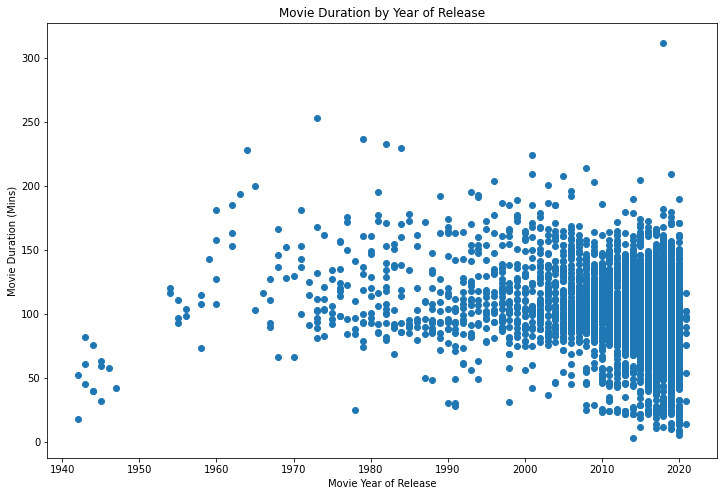

In [34]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_df_movies_only["release_year"], netflix_df_movies_only["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")
plt.xlabel("Movie Year of Release")
plt.ylabel("Movie Duration (Mins)")

# Show the plot
plt.show()

#### 7. Digging deeper
This is already much more informative than the simple plot we created using the initial data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long!.Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [35]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_df_movies_only[netflix_df_movies_only["duration"] < 60]

# Print the first 20 rows of 
short_movies = short_movies[["title", "country", "genre", "release_year", "duration"]]
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

#### 8. Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!



In [36]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children":
        colors.append("red")
      
    elif row["genre"] == "Documentaries" :
          colors.append("blue")
            
    elif row["genre"] == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")
        


# Inspect the first 10 values in your list        
print(colors[:10])
#print(colors[:])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


#### 9. Plotting with color!
Lovely looping! We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

This time, we'll also spruce up our plot with some additional axis labels and a new theme with plt.style.use()

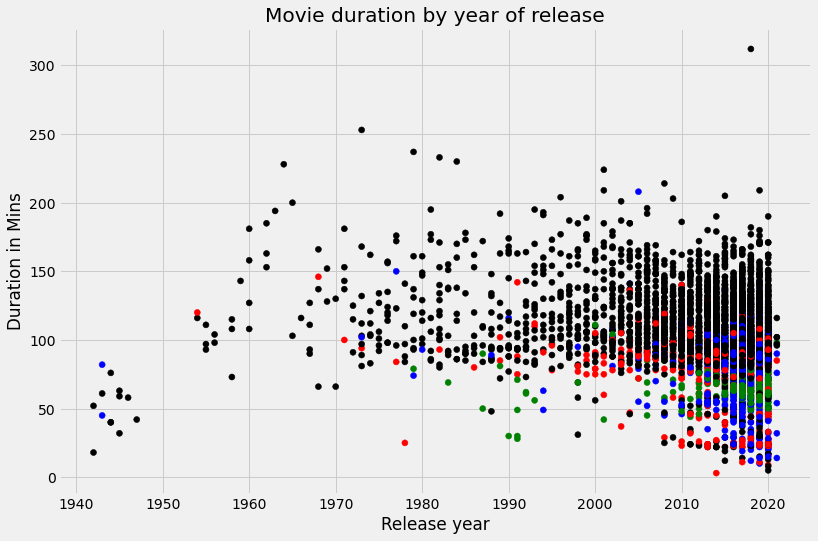

In [37]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c =colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration in Mins")

# Show the plot
plt.show()

#### 10. What next?
Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

Next task will be to answer what next........

Thank you!!!!!!